# Assignment 4
*Topics: least squares approximation*

In this assignment we use least squares approximation to find curves of best fit that come from noisy data, where the original data came from a polynomial. We will see that interpolation is very sensitive to noisy data, and can produce poor approximations of the original curve. On the other hand, a curve of best fit of degree much lower than the size of the data can produce more reliable approximations. 

For details on how to upload your notebook back to canvas, check the canvas homepage for a quick tutorial. For additional help with the jupyter workflow and python in general, attend an office hour at 6pm PST on Wednesday.

*Double check your variable names, and don't import extra libraries! Seriously! Double check your variable names!*



In [245]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Linear Regression
 
Suppose we have $n+1$ points

$$
(t_0,y_0) , (t_1,y_1) , \dots , (t_n,y_n)
$$

and we want to fit a line

$$
y=c_0 + c_1t
$$

that "best fits" the data. There are different ways to quantify what "best fit" means but the most common method is called [least squares linear regression](https://en.wikipedia.org/wiki/Linear_regression). In least squares linear regression, we want to minimize the sum of squared errors

$$
SSE = \sum_i (y_i - (c_0 + c_1 t_i))^2
$$

In matrix notation

$$
A =
\begin{bmatrix}
1 & t_0 \\\
1 & t_1 \\\
\vdots & \vdots \\\
1 & t_n
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{c} = 
\begin{bmatrix}
c_0 \\\ c_1
\end{bmatrix}
$$

then the sum of squared errors can be expressed as

$$
SSE = \Vert \mathbf{y} - A \mathbf{c} \Vert^2
$$

We solve for the coefficients $\mathbf{c} = [c_0,c_1]^T$ which minimize $\Vert \mathbf{y} - A \mathbf{c} \Vert^2$ in two ways:

### Normal Equations

The coefficient vector $\mathbf{c}$ is the unique solution of the system 

$$
\left( A^T A \right) \mathbf{c} = A^T \mathbf{y} \tag{1}
$$

### QR Decomposition

Let $A = Q_1R_1$ be the [(thin) QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of $A$ (where $R_1$ is square upper triangular). The coefficient vector $\mathbf{c}$ is the unique solution of the system

$$
R_1 \mathbf{c} = Q_1^T \mathbf{y} \tag{2}
$$

## Polynomial Regression

The same idea works for fitting a degree $d$ polynomial model

$$
y = c_0 + c_1t + c_2t^2 + \cdots + c_dt^d
$$

to a set of $n+1$ data points

$$
(t_0,y_0), (t_1,y_1), \dots , (t_n,y_n)
$$

We form the matrices as before but now the Vandermonde matrix $A$ has $d+1$ columns

$$
A =
\begin{bmatrix}
1 & t_0 & t_0^2 & \cdots & t_0^d \\\
1 & t_1 & t_1^2 & \cdots & t_1^d \\\
 & \vdots & & & \vdots \\\
1 & t_n & t_n^2 & \cdots & t_n^d
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{c} =
\begin{bmatrix}
c_0 \\\
c_1 \\\
c_2 \\\
\vdots \\\
c_d
\end{bmatrix}
$$

The coefficients $\mathbf{c} = [c_0,c_1,c_2,\dots,c_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$
\left( A^T A \right) \mathbf{c} = \left( A^T \right) \mathbf{y}
$$

# Exercises

**Exercise 1** 
The point of this exercise is to familiarize yourself with using the normal equation and the QR decomposition to find linear and quadratic regressions. 



**Exercise 1(a)**  

For the set of points $S$ given below find the line of best fit for $S$ using least squares regression. Use equations (1) and (2) and check that the answer is the same in each case. Record your answer by assigning the variable C1 the list [a,b] where the line you found has the form $y = ax+b$. 

Note that the code Q,R= np.linalg.qr(A) will give the (full) QR-decomposition of A with A = QR. 

In the below python cell, the variable XVAL1A is a list of the x-values and YVAL1A is a list of the y-values (to save you time). To be clear, the points of $S$ consist of the pairs $(XVAL1A[i],YVAL1A[i])$ for $i = 0,1,...,19$. 



In [246]:
XVAL1A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
YVAL1A = [-10.4, 4.66, 4.08, -2.09, 4.04, 6.12, 9.28, 11.23, 12.56, 25.54, 25.79, 14.93, 13.9, 34.65, 21.61, 26.89, 28.78, 30.18, 30.0, 40.05]

In [247]:
# YOUR CODE HERE
A = np.ones((len(XVAL1A), 2))
A[:, 0] = XVAL1A
cArr = np.linalg.solve(
    np.matmul(A.transpose(), A), 
    np.matmul(A.transpose(), np.array(YVAL1A).transpose())
)
C1 = cArr.tolist()
print(C1)
Q1, R1 = np.linalg.qr(A, mode = "reduced")
cArr2 = np.linalg.solve( R1, np.matmul(Q1.transpose(), np.array(YVAL1A).transpose()) )
cArr2.tolist()

[2.0836090225563897, -3.2042857142857]


[2.0836090225563906, -3.2042857142857173]

In [248]:
assert isinstance(C1,list), "make C1 a list"
print("Checkpoint 1.1 passed")


Checkpoint 1.1 passed


**Exercise 1(b)**  

For the set of points $T$ given below find the quadratic curve of best fit for $T$ using least squares regression. Record your answer by assigning the variable C2 the list [a,b,c] where the quadratic you found has the form $y = ax^2+bx+c$. 



$T$ is a set of 28 points. The $X$-values in ascending order are:

[-90, -83, -76, -69, -62, -55, -48, -41, -34, -27, -20, -13, -6, 1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99]

The corresponding $Y$-values, are: 

[40595.0, 34532.0, 28959.9, 23879.0, 19284.6, 15185.1, 11571.0, 8451.2, 5817.0, 3675.8, 2025.2, 860.9, 190.0, 7.0, 316.9, 1115.0, 2403.1, 4179.3, 6449.4, 9205.4, 12454.9, 16190.7, 20420.7, 25139.3, 30346.6, 36042.7, 42231.5, 48908.6]

In the below python cell, the variable XVAL1B is a list of the x-values and YVAL1B is a list of the y-values (to save you time). To be clear, the points of $T$ consist of the pairs $(XVAL1B[i],YVAL1B[i])$ for $i = 0,1,...,27$. 






In [249]:
XVAL1B = [-90, -83, -76, -69, -62, -55, -48, -41, -34, -27, -20, -13, -6, 1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99]
YVAL1B = [31991.0, 41459.7, 37941.4, 23852.1, 14275.0, 22522.1, 17911.4, 8225.7, 3314.7, 10473.0, 11163.9, -2039.0, 9611.9, 2696.3, 2563.8, 2560.1000000000004, -3437.6000000000004, 2355.3, 4226.799999999999, 4420.599999999999, 4189.299999999999, 21435.2, 13873.9, 15265.099999999999, 40025.0, 33263.0, 36601.3, 39856.3]


In [250]:
# YOUR CODE HERE
A2 = np.ones((len(XVAL1B), 3))
A2[:, 0] = np.square(XVAL1B)
A2[:, 1] = XVAL1B 
c2Arr = np.linalg.solve(
    np.matmul(A2.transpose(), A2), 
    np.matmul(A2.transpose(), np.array(YVAL1B).transpose())
)
C2 = c2Arr.tolist()
print(C2)

[4.527004297993036, -38.35367673026009, 1699.7159307792936]


In [251]:
assert isinstance(C2,list), "make C2 a list"
print("Checkpoint 1.3 passed")


Checkpoint 1.3 passed


**Exercise 1(c)** (Not for marks)

Lets plot the points and the approximation polynomial for both 1(a) and 1(b). To plot the line or curve found through the regression, first define a python function that gives the value of the function. I've called it regline and regquad. The plotting cells should run using the regression curve that you found in 1(a) and 1(b), so these plots give you a way of checking your answer! If the curve you see doesn't approximate the point set well, then go back and check your calculation!






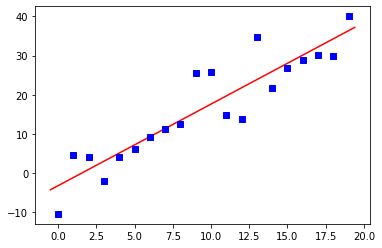

In [252]:
def regline(t):
    return C1[0]*t + C1[1]


t = np.arange(-0.5, 19.5, 0.1)

XVAL1A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
YVAL1A = [-10.4, 4.66, 4.08, -2.09, 4.04, 6.12, 9.28, 11.23, 12.56, 25.54, 25.79, 14.93, 13.9, 34.65, 21.61, 26.89, 28.78, 30.18, 30.0, 40.05]


plt.plot(t, regline(t),'red',XVAL1A, YVAL1A, 'bs')
plt.show()




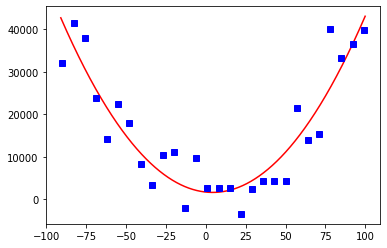

In [253]:
def regquad(t):
    return C2[0]*t**2 + C2[1]*t+C2[2]


t2 = np.arange(min(XVAL1B)-1, max(XVAL1B)+1, 0.1)

plt.plot(t2, regquad(t2),'red',XVAL1B, YVAL1B, 'bs')
plt.show()

**Exercise 2**

In this exercise we have selected a degree 8 polynomial. You'll first discover what the polynomial was using Vandermonde interpolation (i.e. monomial interpolation). After that, we will see that interpolating a data set with error gives a new curve that is likely to be a poor approxmation of the original. On the other hand, we will see that doing a regression on data set with error with a degree significantly smaller than the size of the data set can provide much more 'robust' or 'repeatable' approximations. 

**Exercise 2(a)** The following set of points belong to a degree 8 curve. The x-values XVAL2A correspond to the y-values YVAL2A in order. Use Vandermonde interpolation to find the original degree 8 curve. Record your answer by assigning the variable POLY8 = [a0,a1,a2,a3,a4,a5,a6,a7,a8] where the coefficient of the $x^i$ term is ai. 


In [254]:
XVAL2A = [-2.5,-1.8,-1.2,-0.5,-0.25,0.4,1.5,2.3,3.5]
YVAL2A = [-527.87109375, 102.37280256000003, 53.137244159999966, -55.37109375, -35.05393981933594, 41.06059776, -55.37109375, 80.27820800999987, -527.87109375]

In [255]:
# YOUR CODE HERE
V = np.vander(XVAL2A, increasing = True)
POLY8 = np.linalg.solve(V, np.array(YVAL2A).transpose()).tolist()
POLY8

[2.5863755581667647e-12,
 144.0000000000045,
 -36.000000000024265,
 -196.00000000001265,
 49.00000000001848,
 56.000000000005706,
 -14.00000000000441,
 -4.0000000000006315,
 1.0000000000003206]

In [256]:
assert isinstance(POLY8,list), "make POLY8 a list"
print("Checkpoint 2.1 passed")


Checkpoint 2.1 passed


**Exercise 2(b)** Now lets introduce some error into the points used in 2(a) and interpolate again. After interpolating, use the below cell to plot the true polynomial with the one you've found after the introduced error. You should see that they are quite different. The points with error are given in the below cell. Use Vandermonde interpolation to find the new polynomial. 

Step 1: Assign the variable EPOLY8 = [a0,a1,a2,a3,a4,a5,a6,a7,a8] where the coefficient of the $x^i$ term is ai in your new polynomial. 



Step 2: If $p(x)$ is the true polynomial found in 2(a) and $p_e(x)$ is the polynomial you find with the 'data with noise' set given below, assign the variable E2B the value 
$$ |p(1.4)-p_e(1.4)|/|p(1.4)|,$$
a measure of error. 

Step 3: Run the plotting cell to see the difference between the two polynomials. (not for marks)




In [257]:
XVAL2B = XVAL2A
YVAL2B = [-564.8220703125, 178.12867645440005, 11.15882127359999, -31.561523437500004, -68.00464324951172, 18.477268992, -34.8837890625, 142.0924281776998, -311.4439453125]

In [258]:
# YOUR CODE HERE
EPOLY8 = np.linalg.solve(V, np.array(YVAL2B).transpose()).tolist()
print(EPOLY8)

POLY8Fn = np.polynomial.polynomial.Polynomial(POLY8)
EPOLY8Fn = np.polynomial.polynomial.Polynomial(EPOLY8)

E2B = abs(POLY8Fn(1.4) - EPOLY8Fn(1.4)) / abs(POLY8Fn(1.4))

[-73.65199459404874, 72.43479434577603, 418.13821877743317, 77.74126407894441, -322.49291954289043, -79.61745660012342, 81.55399819059755, 11.607508700762718, -6.365174366011124]


In [259]:
assert isinstance(EPOLY8,list), "make EPOLY8 a list"
print("Checkpoint 2.3 passed")


Checkpoint 2.3 passed


In [260]:
assert isinstance(E2B,float), "make E2B a float"
print("Checkpoint 2.5 passed")


Checkpoint 2.5 passed


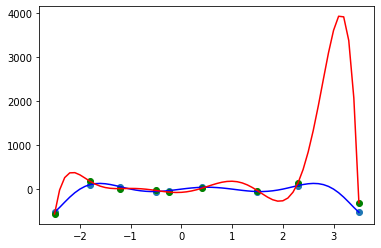

In [261]:
#PLOTTING CELL

def poly8(x):
    p = 0
    for i in range(len(POLY8)):
        p += POLY8[i]*x**i

        
    return p


def epoly8(x):
    p = 0
    for i in range(len(EPOLY8)):
        p += EPOLY8[i]*x**i

        
    return p



t3 = np.arange(-2.5, 3.6, 0.1)

plt.scatter(XVAL2A, YVAL2A)
plt.scatter(XVAL2A, YVAL2B, color="green")
plt.plot(t3, poly8(t3),'blue',t3,epoly8(t3),'red')
plt.show()

**Exercise 2(c)** Now use the least squares method to find a cubic of best fit through the non-noisy data given in 2(a). Use the least squares method again to find a cubic of best fit through the noisy data given in 2(b). If the cubic from the non-noisy data is $f(x)$ and the cubic from the noisy data is $f_e(x)$, compute the quotient 
$$ |f(1.4)-f_e(1.4)|/|f(1.4)| ,$$
and assign it to the variable E2C. Note that in this case the two cubic curves are more similar to each other than the two degree 8 curves found in 2(a) and 2(b). In particular, E2C is significantly less than E2B. 


In [262]:
# YOUR CODE HERE
A3 = np.ones((len(XVAL2A), 4))
A3[:, 1] = XVAL2A 
A3[:, 2] = np.array(XVAL2A) ** 2
A3[:, 3] = np.array(XVAL2A) ** 3
c3Arr = np.linalg.solve(
    np.matmul(A3.transpose(), A3), 
    np.matmul(A3.transpose(), np.array(YVAL2A).transpose())
)
c4Arr = np.linalg.solve(
    np.matmul(A3.transpose(), A3), 
    np.matmul(A3.transpose(), np.array(YVAL2B).transpose())
)
print(c3Arr)
print(c4Arr)


POLY3Fn = np.polynomial.polynomial.Polynomial(c3Arr)
EPOLY3Fn = np.polynomial.polynomial.Polynomial(c4Arr)


E2C = abs(POLY3Fn(1.4) - EPOLY3Fn(1.4)) / abs(POLY3Fn(1.4))


[ 84.79474994  33.50606364 -56.6350559    0.85799048]
[ 76.11511948  24.56284604 -49.96581091   5.03614535]


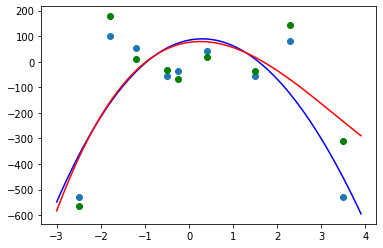

In [263]:
#PLOTTING CELL



t3 = np.arange(-3, 4, 0.1)

plt.scatter(XVAL2A, YVAL2A)
plt.scatter(XVAL2A, YVAL2B, color="green")
plt.plot(t3, POLY3Fn(t3),'blue',t3,EPOLY3Fn(t3),'red')
plt.show()

In [264]:
assert isinstance(E2C,float), "make E2C a float"
print("Checkpoint 2.7 passed")


Checkpoint 2.7 passed


**Exercise 2(d)** Now lets see we can 'learn' a polynomial from a large enough data set, even if there is noise. Below we give a set of 50 points, XVAL2D and YVAL2D. Use a least squares regression to learn the degree 8 polynomial of best fit through the data. Once again, the data will have 2% pseudorandom noise from the true values. Record your answer by assigning the variable POLY8D = [a0,a1,a2,a3,a4,a5,a6,a7,a8] where the coefficient of the $x^i$ term is ai. 

Note how much better we were able to learn the original degree 8 polynomial with more data, despite there still being a significant amount of noise. 



In [265]:
XVAL2D=[-5.0, -4.8100000000000005, -4.62, -4.43, -4.24, -4.05, -3.86, -3.67, -3.48, -3.29, -3.1, -2.91, -2.72, -2.5300000000000002, -2.34, -2.15, -1.96, -1.77, -1.58, -1.3900000000000001, -1.2, -1.01, -0.8200000000000001, -0.63, -0.44, -0.25, -0.06, 0.13, 0.32, 0.51, 0.7000000000000001, 0.89, 1.08, 1.27, 1.46, 1.6500000000000001, 1.84, 2.0300000000000002, 2.22, 2.41, 2.6, 2.79, 2.98, 3.17, 3.36, 3.5500000000000003, 3.74, 3.93, 4.12, 4.3100000000000005, 4.5, 4.69, 4.88]
YVAL2D = [364331.52, 250196.97142492794, 174510.42445803568, 117547.96804333516, 73539.24544491842, 45181.00098766322, 27659.57177276294, 14763.051038402436, 7441.649748920511, 2956.451497970913, 648.5088248100024, -359.7448354667251, -628.9195046132951, -567.932956820949, -339.7858725491313, -129.7399913845925, 27.448333432995813, 111.04013266626525, 130.81666701141782, 101.45475052899141, 53.98744006655997, 2.3991973245218143, -36.167316606287784, -53.65834260248244, -53.86407051910762, -34.633292541503906, -8.848846571482458, 17.52002220583533, 36.363230377409714, 42.27139416152187, 34.83806516189999, 15.0000586715381, -11.508449308709155, -37.54639993300221, -53.09845251182722, -54.204978907297935, -32.378666066689014, 7.376933338722551, 57.975681333623776, 104.84224124488163, 132.21512478720044, 105.79764253313607, 14.205123185155436, -152.56854603073242, -371.5172974113302, -580.1529280496144, -634.1429136674737, -294.87047968201057, 833.4671516442424, 3245.0895448214346, 7997.2470703125, 16145.285017116747, 29161.81117661468]

In [266]:
# YOUR CODE HERE
A4 = np.vander(XVAL2D, increasing = True)[:, :9]
POLY8D = np.linalg.solve(
    np.matmul(A4.transpose(), A4), 
    np.matmul(A4.transpose(), np.array(YVAL2D).transpose())
).tolist()
POLY8D

[-2187.3675851712355,
 545.1492773338849,
 3089.31078425906,
 -368.7173943361587,
 -633.485800413006,
 73.5390600763241,
 32.988808457297274,
 -4.48930859209339]

In [267]:
assert isinstance(POLY8D,list), "make POLY8D a float"
print("Checkpoint 2.9 passed")


Checkpoint 2.9 passed


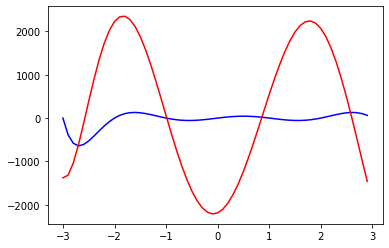

In [268]:
#PLOTTING CELL

def poly8D(x):
    p = 0
    for i in range(len(POLY8D)):
        p += POLY8D[i]*x**i

        
    return p



t3 = np.arange(-3, 3, 0.1)

plt.plot(t3, poly8(t3),'blue',t3,poly8D(t3),'red')
plt.show()